<a href="https://colab.research.google.com/github/jcj217-mc/Data_205/blob/main/Data_205_Project_Part_I_detention_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import packages
import pandas as pd
import numpy as np
import os 
import json

In [ ]:
# tab-separated data into pandas data frame.
df = pd.read_json('https://data.montgomerycountymd.gov/resource/gknn-vrfa.json')

In [ ]:
df.head()

,month_year,detention_services,detention_services_and_community_corrections_names,category,average_daily_population
0,2021-02-01T00:00:00.000,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,325
1,2021-02-01T00:00:00.000,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,918
2,2021-02-01T00:00:00.000,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,485
3,2021-02-01T00:00:00.000,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,50
4,2021-02-01T00:00:00.000,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0


In [ ]:
# check dataframe type
type(df)

pandas.core.frame.DataFrame

In [ ]:
# change column names
df_1 = df.rename(columns = {"month_year": "Date", "detention_services":"DSCC Abbr.", "detention_services_and_community_corrections_names":"DSCC Names", "average_daily_population" : "Avg. Daily Pop."})
df_1.head()

,Date,DSCC Abbr.,DSCC Names,category,Avg. Daily Pop.
0,2021-02-01T00:00:00.000,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,325
1,2021-02-01T00:00:00.000,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,918
2,2021-02-01T00:00:00.000,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,485
3,2021-02-01T00:00:00.000,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,50
4,2021-02-01T00:00:00.000,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0


In [ ]:
# Stripping time but this strip does not remain in further code
df_1['Date'].str.rstrip('T00:00:00.000')

0      2021-02-01
1      2021-02-01
2      2021-02-01
3      2021-02-01
4      2021-02-01
          ...    
439    2015-01-01
440    2015-01-01
441    2015-01-01
442    2015-01-01
443    2015-01-01
Name: Date, Length: 444, dtype: object

In [ ]:
# Checking data types for each column
print(df_1.dtypes)

Date               object
DSCC Abbr.         object
DSCC Names         object
category           object
Avg. Daily Pop.     int64
dtype: object


In [ ]:
#Checking Shape
print(df_1.shape)

(444, 5)


In [ ]:
# Describe
df_1.describe()

,Avg. Daily Pop.
count,444.000000
mean,374.328829
std,291.345574
min,0.000000
25%,107.000000
50%,247.500000
75%,627.250000
max,1025.000000


In [ ]:
# Check null 
df_1.isnull()

,Date,DSCC Abbr.,DSCC Names,category,Avg. Daily Pop.
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
439,False,False,False,False,False
440,False,False,False,False,False
441,False,False,False,False,False
442,False,False,False,False,False


In [ ]:
# Null sum
df_1.isnull().sum()

Date               0
DSCC Abbr.         0
DSCC Names         0
category           0
Avg. Daily Pop.    0
dtype: int64

In [ ]:
# Basic Plots with Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')

In [ ]:
# Changing Date to datetime
df_1.Date = pd.to_datetime(df_1.Date)

In [ ]:
# group by Month/Year
df_1_time = df_1.groupby('Date')
df_1_time.head()

,Date,DSCC Abbr.,DSCC Names,category,Avg. Daily Pop.
0,2021-02-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,325
1,2021-02-01,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,918
2,2021-02-01,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,485
3,2021-02-01,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,50
4,2021-02-01,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0
...,...,...,...,...,...
438,2015-01-01,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,505
439,2015-01-01,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,101
440,2015-01-01,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,77
441,2015-01-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,721


In [ ]:
# Arrange by DSCC Abbreviation - did not work
df_1_abbr = df_1.groupby('DSCC Abbr.')
df_1_abbr.head()

,Date,DSCC Abbr.,DSCC Names,category,Avg. Daily Pop.
0,2021-02-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,325
1,2021-02-01,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,918
2,2021-02-01,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,485
3,2021-02-01,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,50
4,2021-02-01,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0
5,2021-02-01,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,68
6,2021-01-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,335
7,2021-01-01,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,909
8,2021-01-01,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,69
9,2021-01-01,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0


In [ ]:
# Arrange by DSCC Abbreviation then by sort by Date
df_1_abbr2 = df_1.groupby('DSCC Abbr.').apply(lambda x: x.sort_values('Date'))
df_1_abbr2.head(30)

Date  ... Avg. Daily Pop.
DSCC Abbr.                 ...                
ACS        441 2015-01-01  ...             721
           434 2015-02-01  ...             738
           429 2015-03-01  ...             749
           420 2015-04-01  ...             780
           419 2015-05-01  ...             751
           413 2015-06-01  ...             699
           405 2015-07-01  ...             705
           400 2015-08-01  ...             739
           390 2015-09-01  ...             703
           384 2015-10-01  ...             758
           382 2015-11-01  ...             879
           376 2015-12-01  ...             882
           366 2016-01-01  ...             814
           363 2016-02-01  ...             838
           355 2016-03-01  ...             885
           352 2016-04-01  ...             962
           344 2016-05-01  ...            1025
           340 2016-06-01  ...             945
           331 2016-07-01  ...             933
           325 2016-08-01  ...             948
           320 2016-09-01  ...             955
           316 2016-10-01  ...             894
           311 2016-11-01  ...             804
           300 2016-12-01  ...             729
           294 2017-01-01  ...             700
           290 2017-02-01  ...             731
           282 2017-03-01  ...             703
           279 2017-04-01  ...             649
           273 2017-05-01  ...             644
           264 2017-06-01  ...             645

[30 rows x 5 columns]

In [ ]:
df_1_abbr2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 444 entries, ('ACS', 441) to ('PTSU', 1)
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             444 non-null    datetime64[ns]
 1   DSCC Abbr.       444 non-null    object        
 2   DSCC Names       444 non-null    object        
 3   category         444 non-null    object        
 4   Avg. Daily Pop.  444 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 42.2+ KB


In [ ]:
# make datetime - can also do it at dataframe level, put datetime in dictionary 
df_1_abbr2.Date = pd.to_datetime(df_1_abbr2.Date)
df_1_abbr2.head(1)

,,Date,DSCC Abbr.,DSCC Names,category,Avg. Daily Pop.
DSCC Abbr.,,,,,,
ACS,441,2015-01-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,721


In [ ]:
# index changing code


In [ ]:
df_1_abbr2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 444 entries, ('ACS', 441) to ('PTSU', 1)
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             444 non-null    datetime64[ns]
 1   DSCC Abbr.       444 non-null    object        
 2   DSCC Names       444 non-null    object        
 3   category         444 non-null    object        
 4   Avg. Daily Pop.  444 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 42.2+ KB


In [ ]:
# Simplify name
df_2 = df_1_abbr2

In [ ]:
# Create separate columns for month day and year 
df_2.Date = pd.to_datetime(df_2.Date)

In [ ]:
df_2[['month', 'year']] = df_2.Date.apply(lambda x: pd.Series(x.strftime("%m, %Y").split(",")))
df_2

Date DSCC Abbr.  ... month   year
DSCC Abbr.                            ...             
ACS        441 2015-01-01        ACS  ...    01   2015
           434 2015-02-01        ACS  ...    02   2015
           429 2015-03-01        ACS  ...    03   2015
           420 2015-04-01        ACS  ...    04   2015
           419 2015-05-01        ACS  ...    05   2015
...                   ...        ...  ...   ...    ...
PTSU       29  2020-10-01       PTSU  ...    10   2020
           20  2020-11-01       PTSU  ...    11   2020
           17  2020-12-01       PTSU  ...    12   2020
           7   2021-01-01       PTSU  ...    01   2021
           1   2021-02-01       PTSU  ...    02   2021

[444 rows x 7 columns]

In [ ]:
# month and year separate columns created
df_2.groupby(df_2['year'])
df_2.head(10)

Date DSCC Abbr.  ... month   year
DSCC Abbr.                            ...             
ACS        441 2015-01-01        ACS  ...    01   2015
           434 2015-02-01        ACS  ...    02   2015
           429 2015-03-01        ACS  ...    03   2015
           420 2015-04-01        ACS  ...    04   2015
           419 2015-05-01        ACS  ...    05   2015
           413 2015-06-01        ACS  ...    06   2015
           405 2015-07-01        ACS  ...    07   2015
           400 2015-08-01        ACS  ...    08   2015
           390 2015-09-01        ACS  ...    09   2015
           384 2015-10-01        ACS  ...    10   2015

[10 rows x 7 columns]

In [ ]:
# Remove DSCC Name Column
df_2.drop(df_2.columns[[2]], axis=1, inplace=True,)
df_2.head(5)

Date DSCC Abbr.  ... month   year
DSCC Abbr.                            ...             
ACS        441 2015-01-01        ACS  ...    01   2015
           434 2015-02-01        ACS  ...    02   2015
           429 2015-03-01        ACS  ...    03   2015
           420 2015-04-01        ACS  ...    04   2015
           419 2015-05-01        ACS  ...    05   2015

[5 rows x 6 columns]

In [ ]:
# Create separate columns for month day and year 
df_1.Date = pd.to_datetime(df_1.Date)

In [ ]:
df_1[['month', 'year']] = df_1.Date.apply(lambda x: pd.Series(x.strftime("%m, %Y").split(",")))
df_1

,Date,DSCC Abbr.,DSCC Names,category,Avg. Daily Pop.,month,year
0,2021-02-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,325,02,2021
1,2021-02-01,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,918,02,2021
2,2021-02-01,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,485,02,2021
3,2021-02-01,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,50,02,2021
4,2021-02-01,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0,02,2021
...,...,...,...,...,...,...,...
439,2015-01-01,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,101,01,2015
440,2015-01-01,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,77,01,2015
441,2015-01-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,721,01,2015
442,2015-01-01,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,162,01,2015


In [ ]:
# drop date column
df_1a = df_1.drop(df_1.columns[0:1], axis=1)

In [ ]:
df_1a.head(5)

,DSCC Abbr.,DSCC Names,category,Avg. Daily Pop.,month,year
0,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,325,02,2021
1,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,918,02,2021
2,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,485,02,2021
3,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,50,02,2021
4,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0,02,2021


In [ ]:
# Trying to remove index column
df_1a.reset_index(drop=True, inplace=True)
df_1a.head(5)

,DSCC Abbr.,DSCC Names,category,Avg. Daily Pop.,month,year
0,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,325,02,2021
1,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,918,02,2021
2,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,485,02,2021
3,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,50,02,2021
4,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0,02,2021


In [ ]:
# Group by Year Sum
df_year = df_1a.groupby(['year'], as_index=False).agg({'Avg. Daily Pop.': sum})
df_year.head()

,year,Avg. Daily Pop.
0,2015,27811
1,2016,30138
2,2017,27102
3,2018,27464
4,2019,25649


In [ ]:
# Checking data types for each column
print(df_1.dtypes)

Date               datetime64[ns]
DSCC Abbr.                 object
DSCC Names                 object
category                   object
Avg. Daily Pop.             int64
month                      object
year                       object
dtype: object


In [ ]:
# matplotlib plot
import matplotlib.pyplot as plt
df_year.plot(x = 'year', grid=True)
plt.xlabel('year')
plt.ylabel('Avg. Daily Pop.')

NameError: ignored

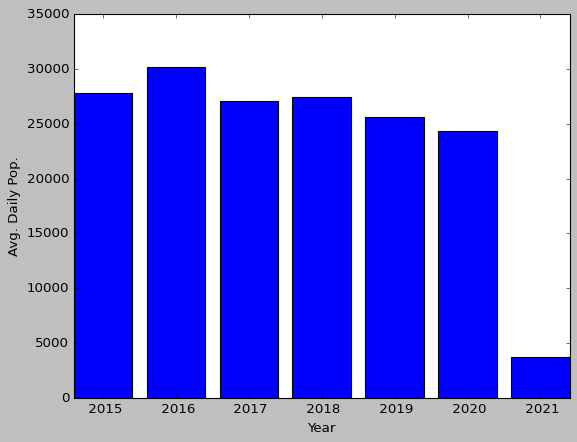

In [ ]:
# matplotlib barplot
import matplotlib.pyplot as plt
x = df_year['year']
y = df_year['Avg. Daily Pop.']
plt.bar(x, y)
plt.xlabel('Year')
plt.ylabel('Avg. Daily Pop.')
plt.show()

In [ ]:
# Sum of avg. daily pop by month and year
df_monthyear = df_1a.groupby(['year', 'month'], as_index=False).agg({'Avg. Daily Pop.': sum})
df_monthyear.head(20)

,year,month,Avg. Daily Pop.
0,2015,01,2284
1,2015,02,2277
2,2015,03,2273
3,2015,04,2343
4,2015,05,2310
5,2015,06,2228
6,2015,07,2215
7,2015,08,2311
8,2015,09,2320
9,2015,10,2347


Text(0, 0.5, 'Avg. Daily Pop.')

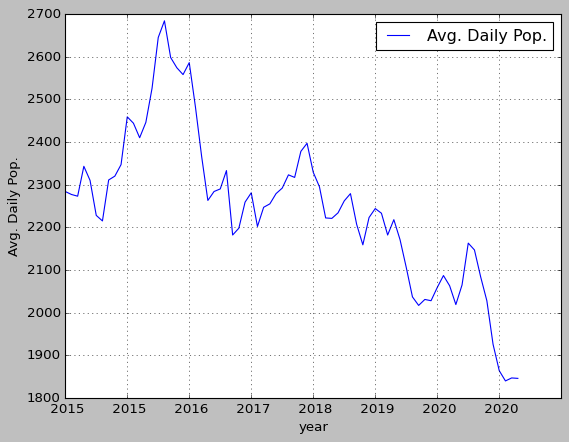

In [ ]:
# matplotlib plot
df_monthyear.plot(x = 'year', grid=True)
plt.xlabel('year')
plt.ylabel('Avg. Daily Pop.')

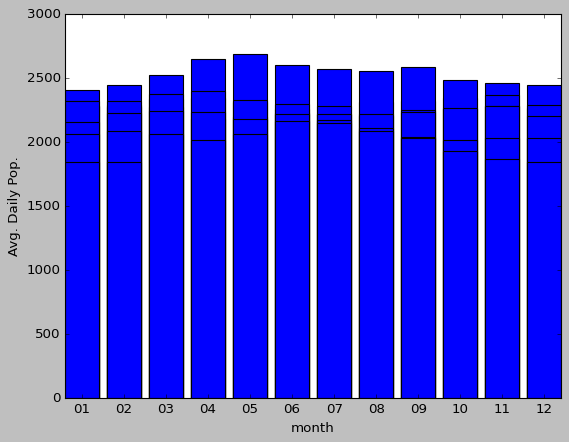

In [ ]:
x = df_monthyear['month']
y = df_monthyear['Avg. Daily Pop.']
plt.bar(x, y)
plt.xlabel('month')
plt.ylabel('Avg. Daily Pop.')
plt.show()

In [ ]:
# trying to isolate entries by year
# df_monthyear.groupby('year').get_group(2015)

In [ ]:
df_monthyear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             74 non-null     object
 1   month            74 non-null     object
 2   Avg. Daily Pop.  74 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ KB


In [ ]:
# turning "year" column into integer instead of object
df_monthyear['year'].astype(int)

0     2015
1     2015
2     2015
3     2015
4     2015
      ... 
69    2020
70    2020
71    2020
72    2021
73    2021
Name: year, Length: 74, dtype: int64

In [ ]:
# turning "month" column into integer instead of object
df_monthyear['month'].astype(int)

0      1
1      2
2      3
3      4
4      5
      ..
69    10
70    11
71    12
72     1
73     2
Name: month, Length: 74, dtype: int64

In [ ]:
# trying to get rid of the lines and select only months for 2015
df_2015 = df_monthyear
df_2015['year'] != 2016
df_2015.iloc[10:20]

,year,month,Avg. Daily Pop.
10,2015,11,2459
11,2015,12,2444
12,2016,01,2410
13,2016,02,2446
14,2016,03,2526
15,2016,04,2645
16,2016,05,2684
17,2016,06,2598
18,2016,07,2574
19,2016,08,2558


In [ ]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             74 non-null     object
 1   month            74 non-null     object
 2   Avg. Daily Pop.  74 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ KB


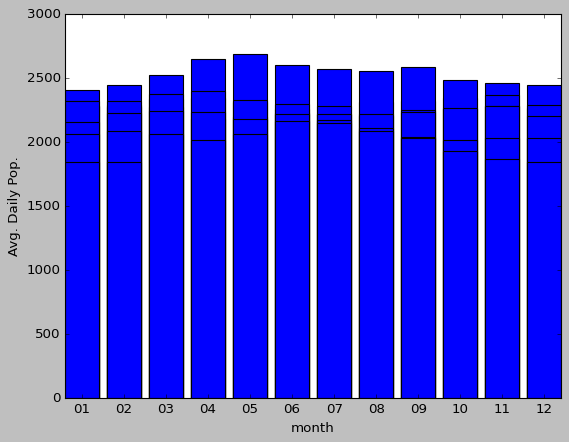

In [ ]:
# Trying to Plot only 2015
x = df_2015['month']
y = df_2015['Avg. Daily Pop.']
plt.bar(x, y)
plt.xlabel('month')
plt.ylabel('Avg. Daily Pop.')
plt.show()

In [ ]:
# example code:  df[(df['age'] > 28) & (df['grade'] == 'A')]
df_monthyear[(df_monthyear['year'] == '2016')]

,year,month,Avg. Daily Pop.


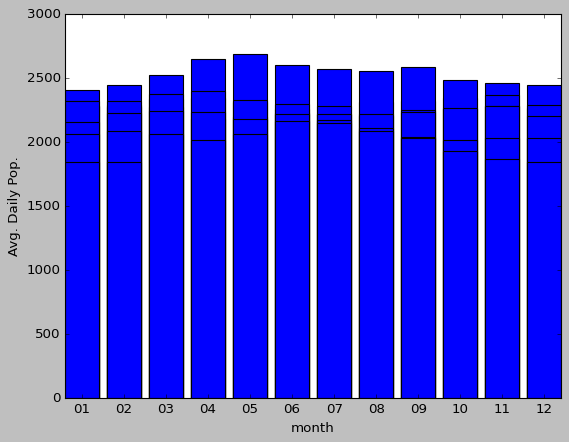

In [ ]:
x = df_monthyear['month']
y = df_monthyear['Avg. Daily Pop.']
plt.bar(x, y)
plt.xlabel('month')
plt.ylabel('Avg. Daily Pop.')
plt.show()
# in plot below the separate lines in each bar are for each year. Will try to add color coded stacking.

In [ ]:
df_dscc = df_1.groupby('DSCC Names').apply(lambda x: x.sort_values('year'))
df_dscc.head(20)

Date DSCC Abbr.  ... month   year
DSCC Names                                                ...             
Alternative Community Services 441 2015-01-01        ACS  ...    01   2015
                               376 2015-12-01        ACS  ...    12   2015
                               382 2015-11-01        ACS  ...    11   2015
                               384 2015-10-01        ACS  ...    10   2015
                               390 2015-09-01        ACS  ...    09   2015
                               400 2015-08-01        ACS  ...    08   2015
                               434 2015-02-01        ACS  ...    02   2015
                               413 2015-06-01        ACS  ...    06   2015
                               419 2015-05-01        ACS  ...    05   2015
                               420 2015-04-01        ACS  ...    04   2015
                               429 2015-03-01        ACS  ...    03   2015
                               405 2015-07-01        ACS  ...    07   2015
                               300 2016-12-01        ACS  ...    12   2016
                               316 2016-10-01        ACS  ...    10   2016
                               320 2016-09-01        ACS  ...    09   2016
                               331 2016-07-01        ACS  ...    07   2016
                               311 2016-11-01        ACS  ...    11   2016
                               344 2016-05-01        ACS  ...    05   2016
                               340 2016-06-01        ACS  ...    06   2016
                               366 2016-01-01        ACS  ...    01   2016

[20 rows x 7 columns]

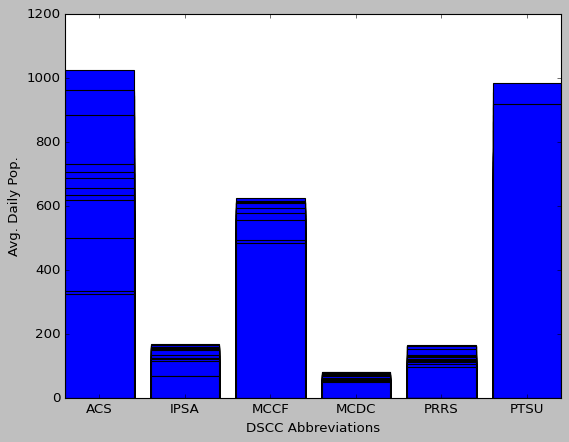

In [ ]:
x = df_dscc['DSCC Abbr.']
y = df_dscc['Avg. Daily Pop.']
plt.bar(x, y)
plt.xlabel('DSCC Abbreviations')
plt.ylabel('Avg. Daily Pop.')
plt.show()
# not sure what lines represent, could be month/year. 

In [ ]:
df_2020 = [(df_monthyear['year'] == 2020)]
df_2020[:]

[0     False
 1     False
 2     False
 3     False
 4     False
       ...  
 69    False
 70    False
 71    False
 72    False
 73    False
 Name: year, Length: 74, dtype: bool]

In [ ]:
df_1.head()

,Date,DSCC Abbr.,DSCC Names,category,Avg. Daily Pop.,month,year
0,2021-02-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,325,02,2021
1,2021-02-01,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,918,02,2021
2,2021-02-01,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,485,02,2021
3,2021-02-01,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,50,02,2021
4,2021-02-01,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0,02,2021


In [ ]:
# Rename columns
df_1 = df_1.rename(columns = {"DSCC Abbr.": "DSCC_Abbr.", "DSCC Names" : "DSCC_Names", "Avg. Daily Pop.": "ADP"})
df_1.head()

,Date,DSCC_Abbr.,DSCC_Names,category,ADP,month,year
0,2021-02-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,325,02,2021
1,2021-02-01,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,918,02,2021
2,2021-02-01,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,485,02,2021
3,2021-02-01,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,50,02,2021
4,2021-02-01,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0,02,2021


In [ ]:
# examine unique categories to try to isolate pre-trial from sentenced
df_1.category.unique()

array(['Criminal Justice Clients under Pre-Trial Services',
       'Inmates in DOCR Custody'], dtype=object)

In [ ]:
# examine uinque DSCC names to try to isolate pre-trial from sentenced
df_1.DSCC_Names.unique()

array(['Alternative Community Services', 'Pre-Trial Supervision Unit',
       'Montgomery County Correctional Facility',
       'Montgomery County Detention Center',
       'Pre-Release and Re-Entry Services',
       'Intervention Program for Substance Abusers'], dtype=object)

In [ ]:
# Drop all row entries with "Pre-Release and Re-Entry Services" since that is post-conviction
df_1_pretrial = df_1[df_1.DSCC_Names != 'Pre-Release and Re-Entry Services']
df_1_pretrial.head()

,Date,DSCC_Abbr.,DSCC_Names,category,ADP,month,year
0,2021-02-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,325,02,2021
1,2021-02-01,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,918,02,2021
2,2021-02-01,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,485,02,2021
3,2021-02-01,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,50,02,2021
5,2021-02-01,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,68,02,2021


In [ ]:
df_1_inmates = df_1_pretrial[df_1_pretrial.category != 'Criminal Justice Clients under Pre-Trial Services']
df_1_inmates.head()

,Date,DSCC_Abbr.,DSCC_Names,category,ADP,month,year
2,2021-02-01,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,485,02,2021
3,2021-02-01,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,50,02,2021
10,2021-01-01,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,53,01,2021
11,2021-01-01,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,481,01,2021
13,2020-12-01,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,47,12,2020


In [ ]:
df_1_inmates.count()

Date          222
DSCC_Abbr.    222
DSCC_Names    222
category      222
ADP           222
month         222
year          222
dtype: int64

In [ ]:
df_1_pts = df_1[df_1.category == 'Criminal Justice Clients under Pre-Trial Services']
df_1_pts.head()

,Date,DSCC_Abbr.,DSCC_Names,category,ADP,month,year
0,2021-02-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,325,02,2021
1,2021-02-01,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,918,02,2021
5,2021-02-01,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,68,02,2021
6,2021-01-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,335,01,2021
7,2021-01-01,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,909,01,2021


In [ ]:
df_1_pts.value_counts()

Date        DSCC_Abbr.  DSCC_Names                                  category                                           ADP  month  year 
2021-02-01  PTSU        Pre-Trial Supervision Unit                  Criminal Justice Clients under Pre-Trial Services  918  02      2021    1
2016-12-01  ACS         Alternative Community Services              Criminal Justice Clients under Pre-Trial Services  729  12      2016    1
2017-03-01  PTSU        Pre-Trial Supervision Unit                  Criminal Justice Clients under Pre-Trial Services  721  03      2017    1
            IPSA        Intervention Program for Substance Abusers  Criminal Justice Clients under Pre-Trial Services  151  03      2017    1
            ACS         Alternative Community Services              Criminal Justice Clients under Pre-Trial Services  703  03      2017    1
                                                                                                                                           ..
2019-01-01 

In [ ]:
df_1_pretrial.groupby("category")["ADP"].mean()

category
Criminal Justice Clients under Pre-Trial Services    508.013514
Inmates in DOCR Custody                              308.358108
Name: ADP, dtype: float64

In [ ]:
df_1.groupby("category")["ADP"].mean()

category
Criminal Justice Clients under Pre-Trial Services    508.013514
Inmates in DOCR Custody                              240.644144
Name: ADP, dtype: float64

In [ ]:
df_1.groupby("category")["ADP"].sum()

category
Criminal Justice Clients under Pre-Trial Services    112779
Inmates in DOCR Custody                               53423
Name: ADP, dtype: int64

In [ ]:
df_1_pretrial.groupby("category")["ADP"].sum()

category
Criminal Justice Clients under Pre-Trial Services    112779
Inmates in DOCR Custody                               45637
Name: ADP, dtype: int64

Text(0.5, 1.0, 'ADP by Year')

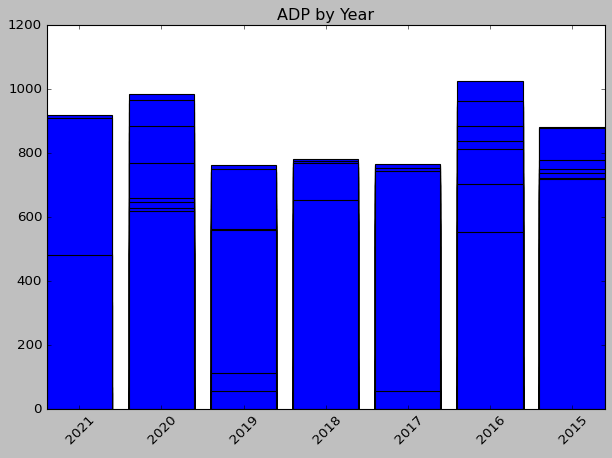

In [ ]:
#PLOT 1 Average Daily Population 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6)) 
plt.bar(x=df_1_pretrial['year'], 
        height=df_1_pretrial['ADP'], 
        color='blue') 
plt.xticks(rotation=45)
plt.title('ADP by Year')

Text(0, 0.5, 'Average Daily Population')

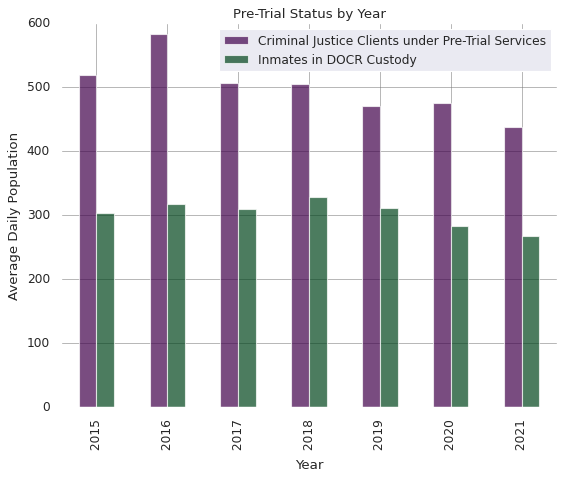

In [ ]:
# Plot Comparing Pretrial services versus detention
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

ax = df_1_pretrial.groupby(['year', 'category'])['ADP'].mean().unstack().plot.bar(colormap='PRGn', alpha = 0.7)
ax.set_facecolor('white')
plt.grid(True, linewidth=0.5, color='grey', linestyle='-')
ax.legend(bbox_to_anchor = [1, 1])
plt.title("Pre-Trial Status by Year")
plt.xlabel("Year")
plt.ylabel("Average Daily Population")


Text(0, 0.5, 'Average Daily Population')

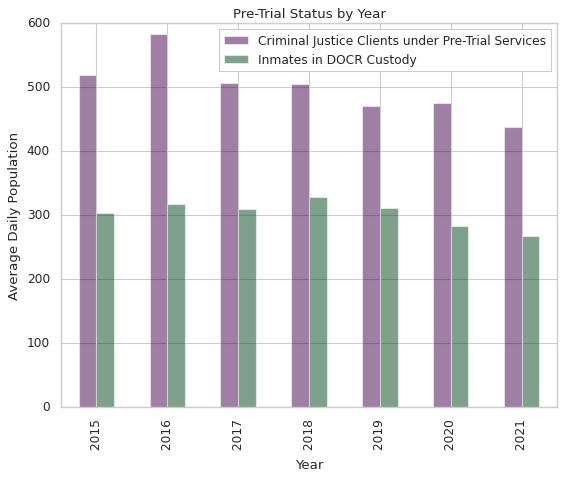

In [ ]:
sns.set_style("whitegrid")

ax = df_1_pretrial.groupby(['year', 'category'])['ADP'].mean().unstack().plot.bar(colormap='PRGn', alpha = 0.5)
ax.legend(bbox_to_anchor = [1, 1])
plt.title("Pre-Trial Status by Year")
plt.xlabel("Year")
plt.ylabel("Average Daily Population")

In [ ]:
df_1.head()

,Date,DSCC_Abbr.,DSCC_Names,category,ADP,month,year
0,2021-02-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,325,02,2021
1,2021-02-01,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,918,02,2021
2,2021-02-01,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,485,02,2021
3,2021-02-01,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,50,02,2021
4,2021-02-01,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0,02,2021


Text(0, 0.5, 'Total')

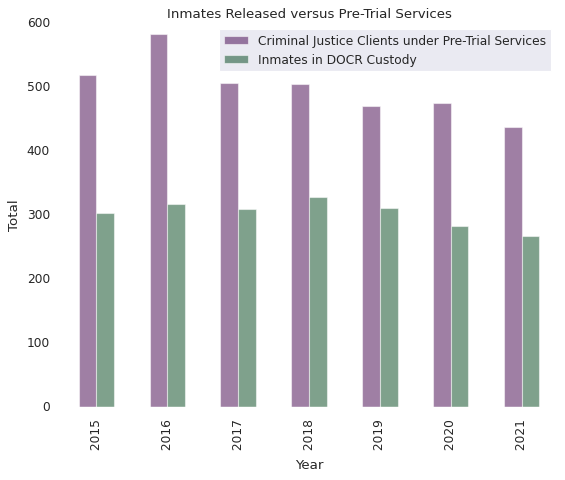

In [ ]:
ax = df_1_pretrial.groupby(['year', 'category'])['ADP'].mean().unstack().plot.bar(colormap='PRGn', alpha = 0.5)
ax.set_facecolor('white')
ax.legend(bbox_to_anchor = [1, 1])

plt.title('Inmates Released versus Pre-Trial Services')
plt.xlabel('Year')
plt.ylabel('Total')

In [ ]:
df_categoryyear = pd.DataFrame(df_1_pretrial.groupby(['year', 'category'])['ADP'].mean())
df_catyearplot = pd.DataFrame(round(df_categoryyear.ADP, 1))

In [ ]:
df_catyearplot

ADP
year  category                                                
 2015 Criminal Justice Clients under Pre-Trial Services  518.9
      Inmates in DOCR Custody                            303.9
 2016 Criminal Justice Clients under Pre-Trial Services  583.3
      Inmates in DOCR Custody                            318.0
 2017 Criminal Justice Clients under Pre-Trial Services  506.9
      Inmates in DOCR Custody                            309.7
 2018 Criminal Justice Clients under Pre-Trial Services  505.4
      Inmates in DOCR Custody                            329.4
 2019 Criminal Justice Clients under Pre-Trial Services  470.3
      Inmates in DOCR Custody                            312.0
 2020 Criminal Justice Clients under Pre-Trial Services  475.0
      Inmates in DOCR Custody                            284.0
 2021 Criminal Justice Clients under Pre-Trial Services  437.3
      Inmates in DOCR Custody                            267.2